# Intro to TensorFlow & Keras 
## MNIST Dataset Classification
### Hesam Asadollahzadeh - University of Tehran

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras as tfk

In [2]:
mnist = tfk.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


* Plotting some examples and their labels from dataset:

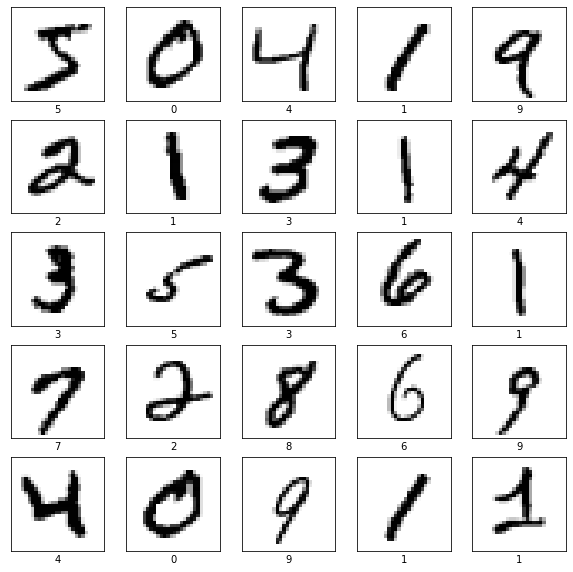

In [5]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[i])

* Normalizing values:

In [6]:
np.max(x_train)

255

In [7]:
x_train = x_train/255
x_text = x_test/255

* Constructing our model:

In [15]:
model = tfk.models.Sequential([
            tfk.layers.Flatten(input_shape=(28,28)),
            tfk.layers.Dense(300, activation='relu'),
            tfk.layers.Dense(10, activation='relu'),
])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 dense_5 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


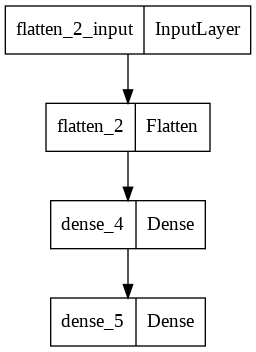

In [16]:
model.summary()
tfk.utils.plot_model(model)

In [17]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy']
)
log = model.fit(x_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.3959 - accuracy: 0.8703
Epoch 2/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.1051 - accuracy: 0.9686
Epoch 3/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0674 - accuracy: 0.9798
Epoch 4/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.0486 - accuracy: 0.9858
Epoch 5/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0361 - accuracy: 0.9888
Epoch 6/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.0259 - accuracy: 0.9918
Epoch 7/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.0211 - accuracy: 0.9939
Epoch 8/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.0173 - accuracy: 0.9948
Epoch 9/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0129 - accuracy: 0.9962
Epoch 10/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.011

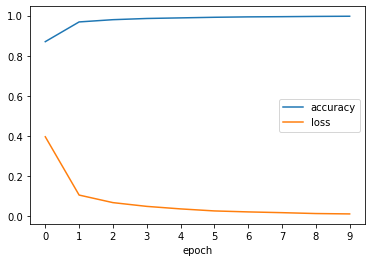

In [30]:
plt.plot(log.history['accuracy'], label='accuracy')
plt.plot(log.history['loss'], label='loss')
plt.xlabel('epoch')
plt.xticks(range(10))
plt.legend()
plt.show()

In [18]:
model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 14.2285 - accuracy: 0.9812


[14.228517532348633, 0.9811999797821045]

In [19]:
pred = model.predict(x_test)
pred.shape

(10000, 10)

In [20]:
f = np.where(np.argmax(pred.T, axis=0) != y_test)[0]

* Plotting some misclassified examples:

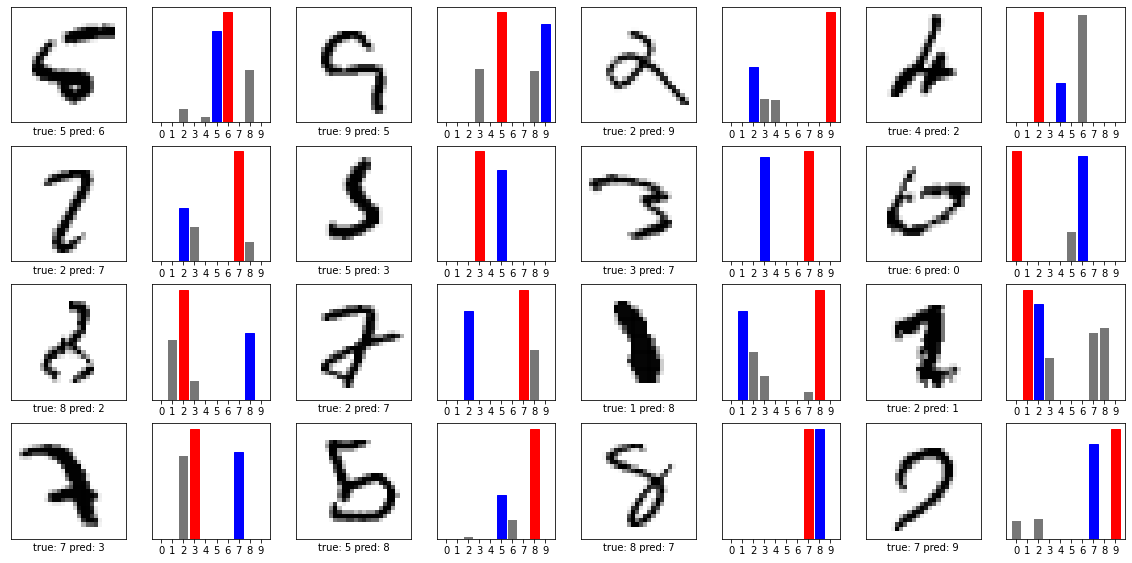

In [21]:
plt.figure(figsize=(20, 20))
j = 1
for i in range(16):
    plt.subplot(8,8,j)
    plt.imshow(x_test[f[i]], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('true: '+str(y_test[f[i]])+' pred: '+str(np.argmax(pred[f[i]])))
    plt.subplot(8,8,j+1)
    fig = plt.bar(range(10), pred[f[i]], color="#777777")
    plt.xticks(range(10))
    plt.yticks([])
    fig[np.argmax(pred[f[i]])].set_color("red")
    fig[y_test[f[i]]].set_color("blue")
    j += 2

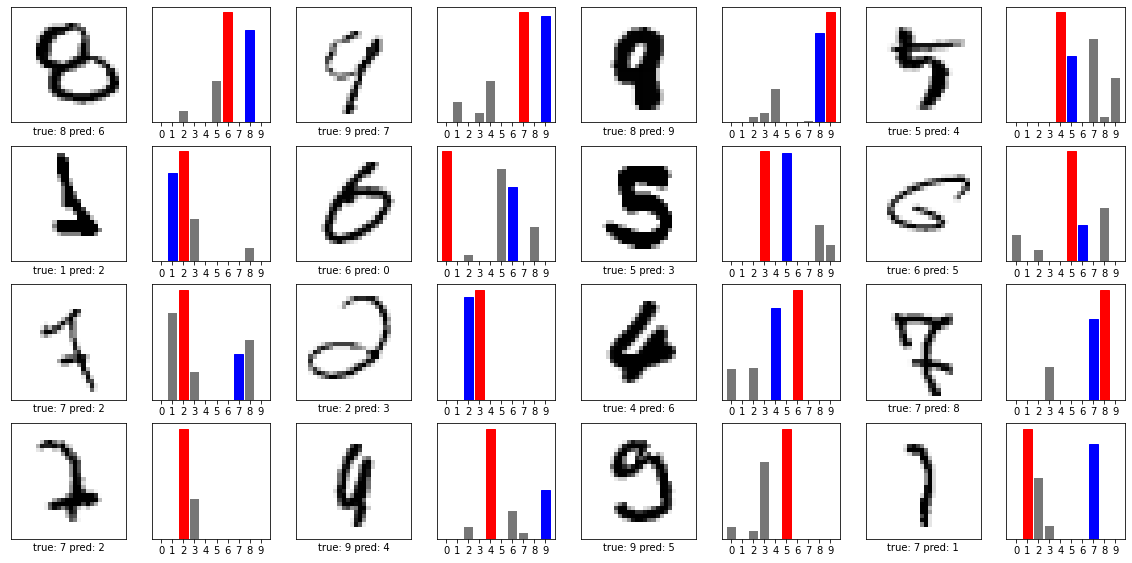

In [22]:
plt.figure(figsize=(20, 20))
j = 1
for i in range(16, 32):
    plt.subplot(8,8,j)
    plt.imshow(x_test[f[i]], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('true: '+str(y_test[f[i]])+' pred: '+str(np.argmax(pred[f[i]])))
    plt.subplot(8,8,j+1)
    fig = plt.bar(range(10), pred[f[i]], color="#777777")
    plt.xticks(range(10))
    plt.yticks([])
    fig[np.argmax(pred[f[i]])].set_color("red")
    fig[y_test[f[i]]].set_color("blue")
    j += 2

* Plotting some correctly classified items:

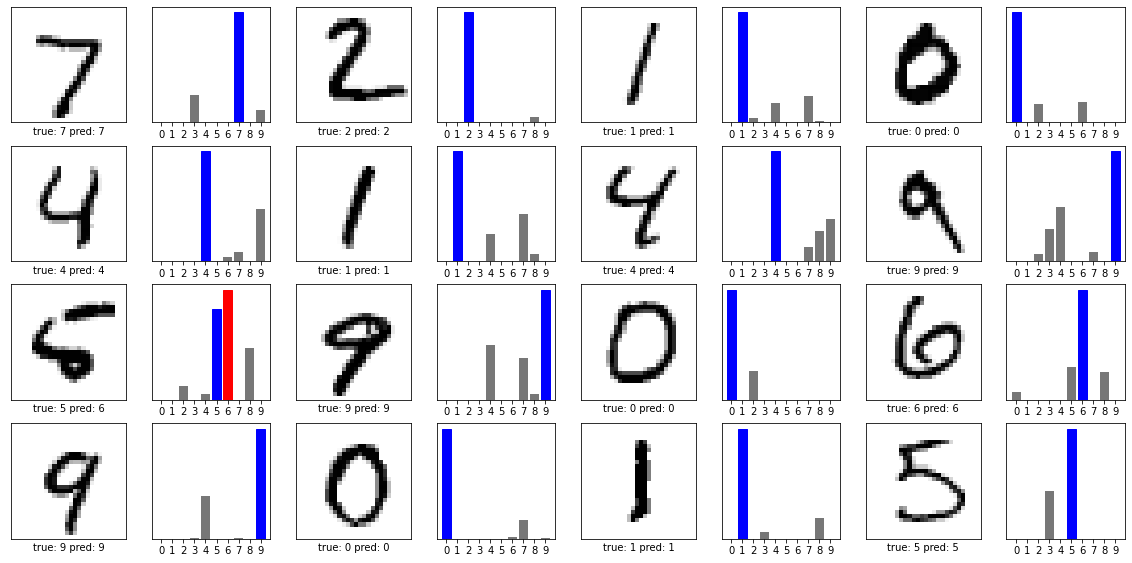

In [23]:
plt.figure(figsize=(20, 20))
j = 1
for i in range(16):
    plt.subplot(8,8,j)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('true: '+str(y_test[i])+' pred: '+str(np.argmax(pred[i])))
    plt.subplot(8,8,j+1)
    fig = plt.bar(range(10), pred[i], color="#777777")
    plt.xticks(range(10))
    plt.yticks([])
    fig[np.argmax(pred[i])].set_color("red")
    fig[y_test[i]].set_color("blue")
    j += 2